# What is Sentiment Analysis?

Sentiment analysis refers to the process of determining the attitude or feeling behind a certain circumstance. It basically means to examine and determine the motivation or feeling behind a writing, speech, or other form of communication. 

Humans connect with one another in a number of languages, and each language is merely a conduit through which we attempt to communicate. Everything we say also carries a sentiment with it. It could be either positive or negative, or it could be neutral.

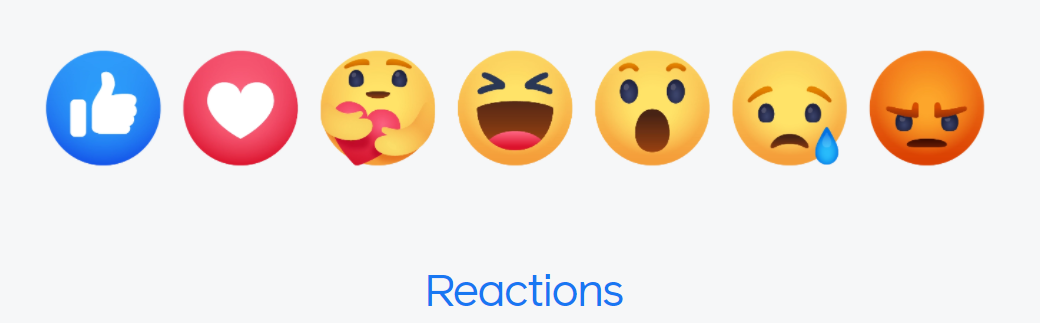

In [1]:
from IPython.display import Image
Image(filename='73683facebook_reactions.png')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix


You can find the dataset <a href='https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp'> here</a>.

In [3]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [4]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True, drop=True)

In [5]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

As we can see, the dataset has 6 labels or targets. A multi-class classifier can be created for sentiment analysis. However, in order to keep things simple, we will combine these descriptors into two groups, namely Positive sentiment and Negative sentiment.

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

In [7]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
    
custom_encoder(df['label'])

In [8]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

Now that the data is more or less in a balanced position, we can see that our aim has changed to 0 and 1, or 0 for Negative and 1 for Positive.

## Data Pre-processing

1. To start, we will cycle through each record and remove all characters other than alphabets using a regular expression.

2. Since the term "Good" differs from the word "good," we will next change the string to lowercase.

3. After that, we will search the data for stopwords and remove them. Stopwords are often used words that don't add anything to a sentence, such as "the," "an," "to," etc.

4. After that, each word will be lemmatized, or have its various forms combined into a single thing called a lemma.

5. And, then return a corpus of processed data.

In [9]:
#object of WordNetLemmatizer
nltk.download('omw-1.4')
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SAGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
corpus = text_transformation(df['text'])

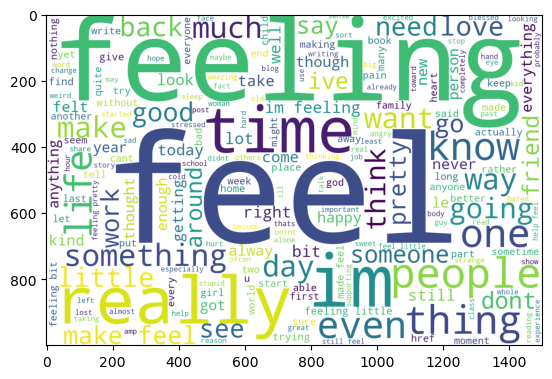

In [11]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1500, height = 1000,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

Now, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [12]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y= df['label']

##  Machine Learning Model

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

## Test Data Transformation

In [14]:
test_df = pd.read_csv("test.txt",delimiter=';',names=['text','label'])

X_test,y_test = test_df.text,test_df.label

#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)

#pre-processing of text
test_corpus = text_transformation(X_test)

#convert text data into vectors
testdata = cv.transform(test_corpus)

#predict the target
predictions = rfc.predict(testdata)

## Model Evaluation

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

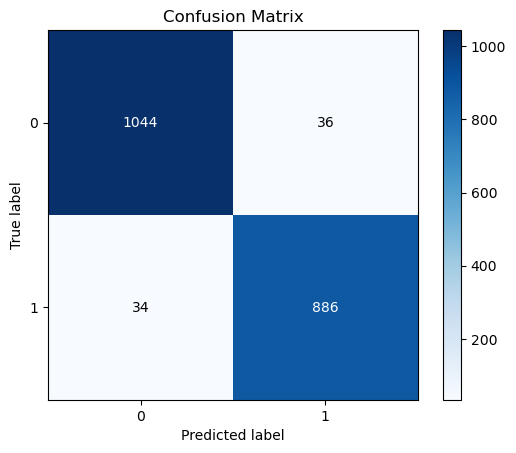

In [15]:
plot_confusion_matrix(y_test,predictions)

In [16]:
acc_score = accuracy_score(y_test,predictions)

pre_score = precision_score(y_test,predictions)

rec_score = recall_score(y_test,predictions)

print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)

cr = classification_report(y_test,predictions)
print(cr)

Accuracy_score:  0.965
Precision_score:  0.9609544468546638
Recall_score:  0.9630434782608696
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1080
           1       0.96      0.96      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.97      0.96      0.97      2000



## Predict for Custom Input

In [17]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [18]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [21]:
input1 = ["Sometimes I just want to punch someone in the face."]
sentiment_predictor(input1)

Input statement has Negative Sentiment.
